In [47]:
# Let's try to read the values in a RMSStatsAll.txt file
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates

class OSMSDailyQAMeasurement(object):
    
    def __init__(self,linetext):
        self.linetext = linetext
        split_line = self.linetext.split()
        self.meas_time = datetime.strptime(split_line[0]+split_line[1], '%y%m%d%H%M%S')
        self.rel_pod_error = float(split_line[2]) 
        
        if split_line[3] == '-':
            self.pod_0_error = None
        else:
            self.pod_0_error = float(split_line[3])
        if split_line[4] == '-':
            self.pod_1_error = None
        else:
            self.pod_1_error = float(split_line[4])
        if split_line[5] == '-':
            self.pod_2_error = None
        else:
            self.pod_2_error = float(split_line[5])       
           
    def getDate(self):
        return self.meas_time.date()
               
    def getTime(self):
        return self.meas_time.time()
    
    def getDatetime(self):
        return self.meas_time
    
    def getRelPodError(self):
        return self.rel_pod_error
    
    def getPod0Error(self):
        return self.pod_0_error
    
    def getPod1Error(self):
        return self.pod_1_error
    
    def getPod2Error(self):
        return self.pod_2_error

class OSMSDailyQALog(object):
    
    def __init__(self,machine,filename):
        self.machine = machine
        self.filename = filename
        self.measurements = []
        self.fill_log()
        
    def __str__(self):
        return 'Machine: {0}, Filename: {1}'.format(self.machine,self.filename)
    
    def fill_log(self):
        RMSStatsAll_file = open(self.filename, 'r')
        for line in RMSStatsAll_file:
            split_line = line.split()        
            if split_line[0] != 'DateTimeStamp':
                self.measurements.append(OSMSDailyQAMeasurement(line))
    
    def create_arrays(self):
        pass
        # for meas in self.measurements

# Open RMSStatsAll.txt
thisLog = OSMSDailyQALog('Room A','X:\Dustin\OSMS\RMSStatsAll.txt')

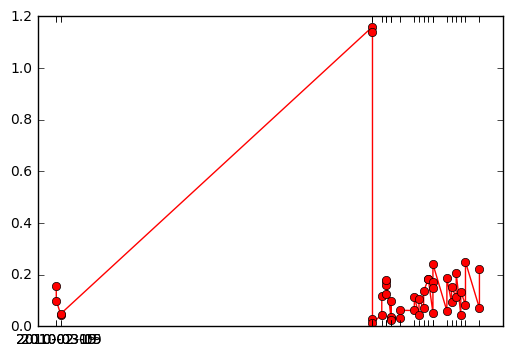

In [55]:
td = []
rpe = []

for meas in thisLog.measurements:
    td.append(meas.getDatetime())
    rpe.append(meas.getRelPodError())
    
x = [date2num(date.date()) for date in td]
y = rpe

fig = plt.figure()

graph = fig.add_subplot(111)

# Plot the data as a red line with round markers
graph.plot(x,y,'r-o')

# Set the xtick locations to correspond to just the dates you entered.
graph.set_xticks(x)

# Set the xtick labels to correspond to just the dates you entered.
graph.set_xticklabels(
        [date.strftime("%Y-%m-%d") for (date, value) in data]
        )

plt.show()


In [26]:
from datetime import datetime
datetime_object = datetime.strptime('161226 143325', '%y%m%d %H%M%S')
print datetime_object
print datetime_object.date()

2016-12-26 14:33:25
2016-12-26


In [28]:
s1 = '161226'
s2 = '143340'
print s1 + ' ' + s2

161226 143340


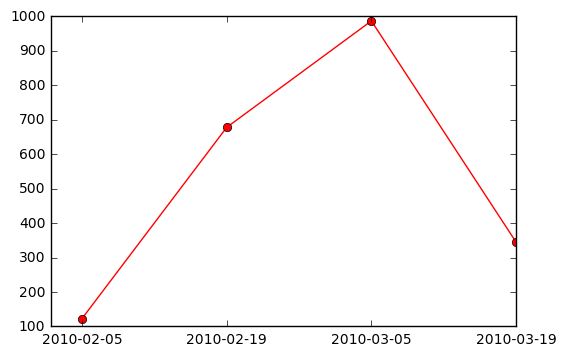

In [43]:
import datetime as DT
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

data = [(DT.datetime.strptime('2010-02-05', "%Y-%m-%d"), 123),
        (DT.datetime.strptime('2010-02-19', "%Y-%m-%d"), 678),
        (DT.datetime.strptime('2010-03-05', "%Y-%m-%d"), 987),
        (DT.datetime.strptime('2010-03-19', "%Y-%m-%d"), 345)]

x = [date2num(date) for (date, value) in data]
y = [value for (date, value) in data]

fig = plt.figure()

graph = fig.add_subplot(111)

# Plot the data as a red line with round markers
graph.plot(x,y,'r-o')

# Set the xtick locations to correspond to just the dates you entered.
graph.set_xticks(x)

# Set the xtick labels to correspond to just the dates you entered.
graph.set_xticklabels(
        [date.strftime("%Y-%m-%d") for (date, value) in data]
        )

plt.show()